In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./data/CNCross/data_table.csv")
print(df.columns)
# Index(['plate', 'row', 'col', 'base', 'base_cas_number', 'base_smiles',
#        'ligand', 'ligand_cas_number', 'ligand_smiles', 'aryl_halide_number',
#        'aryl_halide', 'aryl_halide_smiles', 'additive_number', 'additive',
#        'additive_smiles', 'product_smiles', 'yield'],
#       dtype='object')
#unique values in each column
print(df.nunique())

Index(['plate', 'row', 'col', 'base', 'base_cas_number', 'base_smiles',
       'ligand', 'ligand_cas_number', 'ligand_smiles', 'aryl_halide_number',
       'aryl_halide', 'aryl_halide_smiles', 'additive_number', 'additive',
       'additive_smiles', 'product_smiles', 'yield'],
      dtype='object')
plate                    3
row                     32
col                     48
base                     3
base_cas_number          3
base_smiles              3
ligand                   4
ligand_cas_number        4
ligand_smiles            4
aryl_halide_number      15
aryl_halide             15
aryl_halide_smiles      15
additive_number         23
additive                23
additive_smiles         23
product_smiles           5
yield                 4037
dtype: int64


array([[<Axes: title={'center': 'plate'}>,
        <Axes: title={'center': 'row'}>],
       [<Axes: title={'center': 'col'}>,
        <Axes: title={'center': 'aryl_halide_number'}>],
       [<Axes: title={'center': 'additive_number'}>,
        <Axes: title={'center': 'yield'}>]], dtype=object)

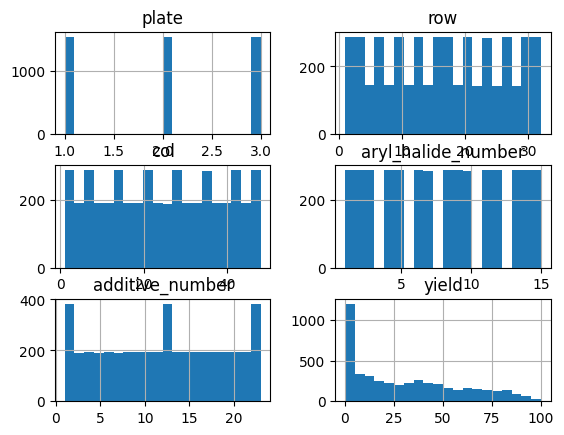

In [3]:
# histogram of all numerial columns 3 columns in plot
df.hist(bins=20)

In [4]:
df[(df["row"] == 7) & (df["col"] == 6)]

,plate,row,col,base,base_cas_number,base_smiles,ligand,ligand_cas_number,ligand_smiles,aryl_halide_number,aryl_halide,aryl_halide_smiles,additive_number,additive,additive_smiles,product_smiles,yield
293,1,7,6,P2Et,165535-45-5,CN(C)P(N(C)C)(N(C)C)=NP(N(C)C)(N(C)C)=NCC,t-BuXPhos,564483-19-8,CC(C)C(C=C(C(C)C)C=C1C(C)C)=C1C2=CC=CC=C2P(C(C...,6.0,1-iodo-4-methoxybenzene,COc1ccc(I)cc1,4.0,ethyl-3-methylisoxazole-5-carboxylate,CCOC(=O)c1onc(C)c1,COc1ccc(Nc2ccc(C)cc2)cc1,49.111432
1820,2,7,6,P2Et,165535-45-5,CN(C)P(N(C)C)(N(C)C)=NP(N(C)C)(N(C)C)=NCC,t-BuXPhos,564483-19-8,CC(C)C(C=C(C(C)C)C=C1C(C)C)=C1C2=CC=CC=C2P(C(C...,6.0,1-iodo-4-methoxybenzene,COc1ccc(I)cc1,12.0,"3,5-dimethylisoxazole",Cc1onc(C)c1,COc1ccc(Nc2ccc(C)cc2)cc1,47.052546
3356,3,7,6,P2Et,165535-45-5,CN(C)P(N(C)C)(N(C)C)=NP(N(C)C)(N(C)C)=NCC,t-BuXPhos,564483-19-8,CC(C)C(C=C(C(C)C)C=C1C(C)C)=C1C2=CC=CC=C2P(C(C...,6.0,1-iodo-4-methoxybenzene,COc1ccc(I)cc1,19.0,"N,N-dibenzylisoxazol-3-amine",C(N(Cc1ccccc1)c2ccon2)c3ccccc3,COc1ccc(Nc2ccc(C)cc2)cc1,63.532847


In [5]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "browser"

# Index(['plate', 'row', 'col', 'base', 'base_cas_number', 'base_smiles',
#        'ligand', 'ligand_cas_number', 'ligand_smiles', 'aryl_halide_number',
#        'aryl_halide', 'aryl_halide_smiles', 'additive_number', 'additive',
#        'additive_smiles', 'product_smiles', 'yield'],
#       dtype='object')
df["row"] = df["row"].astype("category")
df["col"] = df["col"].astype("category")

df["plate"] = df["plate"].astype("category")


fig = px.scatter_matrix(df,
    dimensions=["yield", "aryl_halide_number", "additive_number", "row", "col"],
    color="plate",
    # size="mean_norm_TSNAK",
    hover_data=["plate", "row", "col", "base", "ligand", "aryl_halide", "additive", "product_smiles", "yield"],
    
    )

# make diaginal plots histograms


fig.update_layout(
    hoversubplots="axis",
    width=1000,
    height=1000,
    hovermode="closest",
    font=dict(
        size=6,
    )
)



#show in browser
fig.show()
# sns.pairplot(df_numeric)
# #correlation matrix
# corr = df_numeric.corr()
# # #render as table html
# corr.style.background_gradient(cmap='coolwarm')

In [6]:

import plotly.figure_factory as ff

import numpy as np
import pandas as pd
dataframe = df[["Fitness", "Fitness_raw", "Reads", "row", "col", "border", "Plate" ]]

fig = ff.create_scatterplotmatrix(dataframe, diag='histogram', index='Plate',
                                  height=800, width=800)


fig.show()


KeyError: "['Fitness', 'Fitness_raw', 'Reads', 'border', 'Plate'] not in index"